<b>¡Hola Karla!</b>

Mi nombre es Leo Lucianna, soy code reviewer en Tripleten y tengo el agrado de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>

Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

---

<div class="alert alert-block alert-success">
<b>Revisión 1 - Comentario general </b> <a class="tocSkip"></a>

¡Hola Karla!

Encontrarás mis comentarios a lo largo del proyecto con sugerencias que te pueden servir para terminar de resolver el proyecto.
    
A modo de resumen, estás haciendo un trabajo sobresaliente. Todo el trabajo de transformaciones y procesamiento de datos está perfecto, tu código es claro y eficiente. Haces muy buen uso de los gráficos en tus análisis y tus conclusiones son muy acertadas y valiosas.
    
El único punto que necesitarías para aprobar el proyecto es realizar de nuevo los análisis, pero con otra selección de datos por años. En este proyecto, el análisis y la información valiosa que puedas descubrir sería utilizada por un equipo de marketing para la toma de decisión pare una campaña en el 2017. Por lo tanto sería conveniente entregar hallazgos recientes.
    
Con este cambio que tiene que ver más con una mirada más de entendimiento de negocio, tu proyecto se cerrará con 10 puntos.
    
Sigue así! Y espero la próxima entrega. Éxitos!

</div>


<div class="alert alert-block alert-success">
<b>Revisión 2 - Comentario general </b> <a class="tocSkip"></a>

¡Hola Karla!

Tu trabajo es excelente! En esta iteración, tu proyecto está **aprobado** :) 
    
Felicitaciones por el gran logro!
    
Muchos éxitos para los siguientes sprints!
    
 
</div>

# Games

_______________

## Objetivo

Identificar patrones que determinen si un juego tiene éxito o no

In [1]:
# Importar librerias

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt


In [2]:
# Leer dataset

games = pd.read_csv('/datasets/games.csv')

## Preparación de los datos

In [3]:
# Mostrar información del dataset
 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

En este punto sugiero hacer un `head()` del dataframe. Como buena práctica es hacer un `head` e `info` como primera tarea después de leer los datasets. 
  
</div>

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Cambiar el nombre de las columnas a minúscula

games.columns = games.columns.str.lower()

In [6]:


# Reducir puntuación de 0 - 10 para la columna Critic_Score

games['critic_score'] = (games['critic_score'] / 10)

games['critic_score'].sample(10)

14466    6.3
1123     NaN
9279     8.4
9312     NaN
8202     7.5
14090    NaN
14204    8.2
14286    NaN
8415     7.2
2477     NaN
Name: critic_score, dtype: float64

Cambie la puntuacion de 'critic_score' para que estuviera en el mismo rango que la columna 'user_score'

In [7]:
# Cambiar los tipos de datos de las columnas a los correspondientes

# Cambiar la columna Year_of_Release a entero

games['year_of_release'] = games['year_of_release'].astype('Int64')

In [8]:
# Reemplazar string 'tbd' (to be determined) por valor ausente para poder cambiar a tipo de dato float

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)

Reemplace 'tbd' por un valor nulo porque no tiene una puntuacion definida, y si le pongo 0 va a alterar los datos porque los va a marcar cómo una calificacion que el usuario dio. Ademas, cambie el tipo de dato a float por si más adelante se requiere hacer una operación con esta columna.

In [9]:
# Verificar los cambios

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [10]:
# Cambiar todos los datos string a minúsculas para evitar duplicados de cualquier tipo

for column in games.columns:
    if games[column].dtype == 'object':
        games[column] = games[column].str.lower()
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.6,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.2,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.9,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,5.8,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,8.7,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [11]:
# Comprobar los valores ausentes

games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- En las columnas 'year_of_release' y 'rating' hay valores nan posiblemente porque olvidaron poner el año o no se encontraron los datos
- En las columnas 'critic_score' y 'user_score' hay valores ausentes debido a que los usuarios no pusieron su puntuación

No cambio los valores ausentes, porque si los reemplazo por 0, mediana o media alteraría los datos

In [12]:
# Revisar si hay duplicados

games.duplicated().sum()

0

In [13]:
# Calcular las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11641,major league baseball 2k12,ds,2012,sports,0.07,0.00,0.00,0.01,NaN,NaN,e,0.08
1088,tony hawk's pro skater 3,ps,2001,sports,1.09,0.49,0.02,0.07,8.7,8.3,e,1.67
2856,blur,ps3,2010,racing,0.22,0.36,0.02,0.12,8.1,8.2,e10+,0.72
15462,super bowling,n64,1999,sports,0.02,0.00,0.00,0.00,NaN,NaN,NaN,0.02
4708,superman: the new superman adventures,n64,1999,action,0.33,0.07,0.00,0.00,NaN,NaN,NaN,0.40
8823,indigo prophecy,ps2,2005,adventure,0.07,0.06,0.00,0.02,8.3,7.8,m,0.15
8184,madden nfl 09,xb,2008,sports,0.13,0.04,0.00,0.01,NaN,5.5,e,0.18
8177,nancy drew: the hidden staircase,ds,2008,adventure,0.16,0.00,0.00,0.01,NaN,6.0,e,0.17
932,shrek 2,ps2,2004,platform,1.12,0.69,0.03,0.02,7.1,8.5,e,1.86
5833,"army men world war: land, sea, air",ps,2000,action,0.17,0.12,0.00,0.02,NaN,NaN,NaN,0.31


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Muy buen trabajo de preprocesamiento de datos! Has trabajado muy bien con la imputación de faltantes y la validación de duplicados. Has tenido en cuenta los tipos de datos adecuados, y corregido la cabecera del dataframe. Las transformaciones son muy adecuadas y convenientes. Te felicito por las decisiones en el tratamiento de las columnas de scores, considerando sus faltantes y escalas.
  
</div>

## Analizar los datos

In [14]:
# Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

grp_year = games.groupby(['year_of_release','platform'])['name'].count().reset_index()
grp_year.columns.values[2] = 'total_games_released'
grp_year = grp_year.sort_values('total_games_released',ascending=False).reset_index(drop=True)

grp_year.head(20)

,year_of_release,platform,total_games_released
0,2008,ds,492
1,2009,ds,403
2,2007,ds,376
3,2009,wii,325
4,2010,ds,323
5,2008,wii,282
6,2002,ps2,280
7,2005,ps2,260
8,2004,ps2,259
9,2006,ps2,259


- La plataforma ds lanzo más videojuegos de 2007 - 2010
- Wii fue el segundo de 2008 - 2009

- Mientras que ps2 hizo más lanzamientos de 2002 - 2006 

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Excelente trabajo en la agregación de datos y en describir los hallazgos
  
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Aquí podrías también mostrar el comportamiento general, de cuantos juegos fueron lanzados por año independiente de la plataforma. Formando un gráfico de berras temporal como el que has formado en 'Ventas Totales de Plataformas Seleccionadas por Año'
    
Una estrategia de análisis es empezar por lo general, y luego hacer foco en las particularidades. En este caso puedes comenzar con los lanzamientos totales y luego por plataforma.

  
</div>

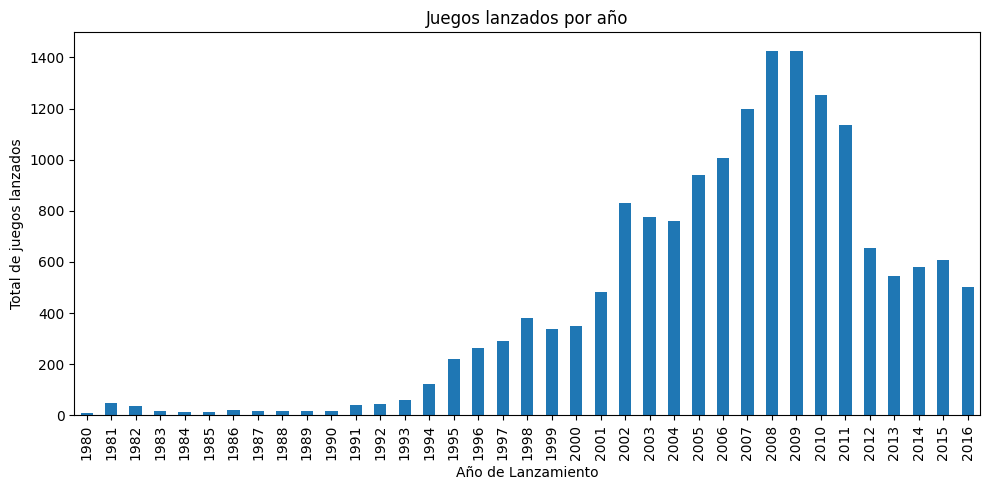

In [15]:
games_by_year = games.groupby(['year_of_release'])['name'].count()

games_by_year.plot(kind='bar', stacked=True,figsize=(10, 5))

plt.title('Juegos lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de juegos lanzados')
plt.tight_layout()

plt.show()

In [16]:
"""" Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye 
una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? """

highest_sales = games.groupby(['platform'])['total_sales'].sum().reset_index()

highest_sales = highest_sales.sort_values('total_sales',ascending=False).reset_index(drop=True)

highest_sales

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


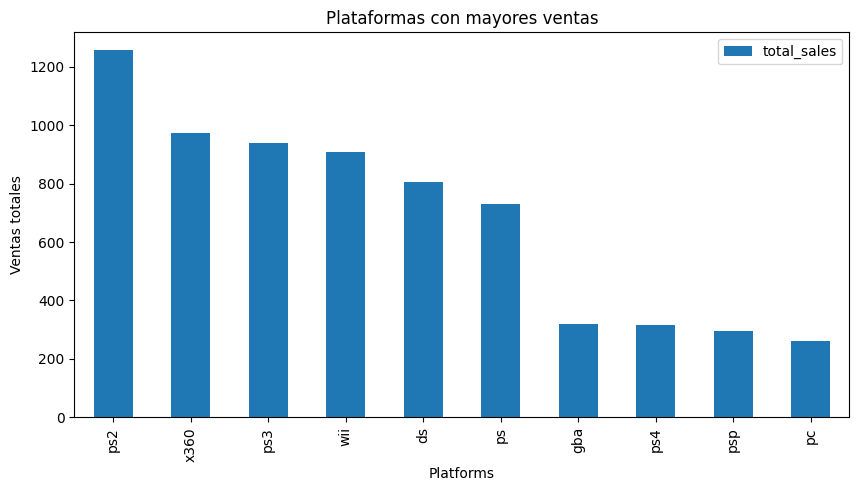

In [17]:
hist_highest_sales = highest_sales[highest_sales['total_sales']>259]

hist_highest_sales.plot(x='platform',kind='bar',title='Plataformas con mayores ventas',xlabel='Platforms',ylabel='Ventas totales', figsize=(10, 5))

plt.legend(['total_sales'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Muy buena decisión de incluir en la visualización y en los análisis solo a las plataformas con más ventas.
  
</div>


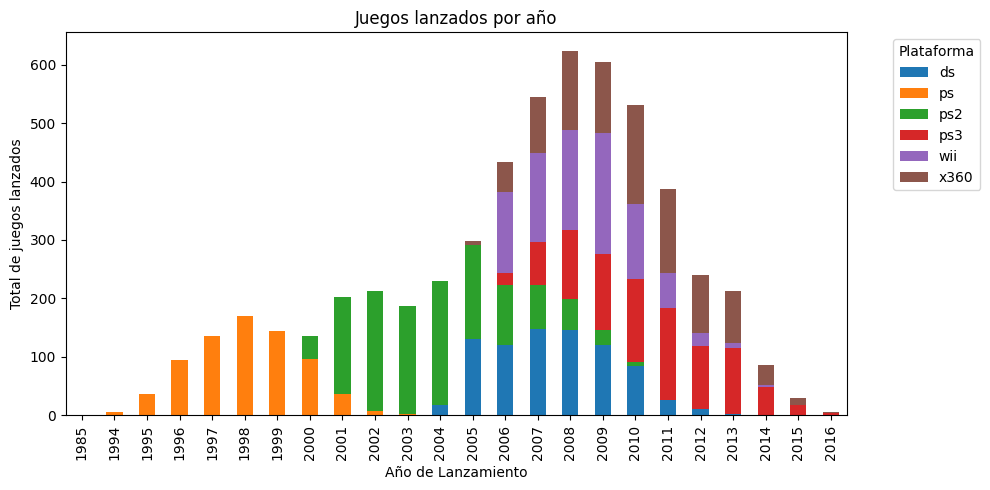

In [18]:
selected_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']  

filtered_df = games[games['platform'].isin(selected_platforms)]

grouped_sales = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

grouped_sales.plot(kind='bar', stacked=True,figsize=(10, 5))

plt.title('Juegos lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de juegos lanzados')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.tight_layout()

plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Este gráfico es excelente! Felicitaciones! Has logrado mostrar múltiples patrones en una sola visualización de manera muy clara.
  
</div>

In [19]:
# Calcular tiempo de vida de las plataformas

platform_life = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

platform_life['lifetime'] = platform_life['max'] - platform_life['min']

platform_life = platform_life.sort_values('lifetime',ascending=False).reset_index(drop=True)

platform_life


,platform,min,max,lifetime
0,pc,1985,2016,31
1,ds,1985,2013,28
2,gb,1988,2001,13
3,x360,2005,2016,11
4,psp,2004,2015,11
5,ps2,2000,2011,11
6,nes,1983,1994,11
7,dc,1998,2008,10
8,wii,2006,2016,10
9,ps3,2006,2016,10


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Muy buena transformación para el cálculo de tiempo de vida de las plataformas.

En base al gráfico y estos resultados, se puede decir que las plataformas más importantes, y sobre todo las de tipo consola, suelen tener una importancia en el mercado de alrededor de 10 años.
  
</div>

No hay una cantidad exacta de cuantos años deben pasar para que aparezca una nueva plataforma, sin embargo, las plataformas antiguas suelen durar más en función de los nuevos lanzamientos de videojuegos.



*Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.*

*Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.*

----------

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables

Las plataformas con mayores ventas son:

- ps2
- x360
- ps3
- wii
- ds

x360 crecio, mientras que ps3 fue disminuyendo


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Ten en consideración que el período que debe tomarse, se basa en aportar hallazgos para que el equipo de marketing haga campañas de juegos en el 2017. Por lo tanto, la información más actual a esta fecha es la más adecuada, sobre todo en este mercado donde, que por lo que has mostrado, es muy dinámico.
    
En resumen, selecciona los años más recientes, de 3 a 5 años, según tu criterio. Lo que tienes que considerar es que cuanto más cercana a 2017 la información es más valiosa y actualizada, pero al mismo tiempo cuanto más años se tiene más soporte y sustento en los datos.
    
    
Luego de esta nueva selección ejecuta de nuevo los análisis de las siguentes secciones y verifica si se producen cambios

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a>

Muy bien! La selección de años hace que los análisis tengan una mayor relevancia para la toma de decisiones de negocio.

</div>


(0.0, 2.5)

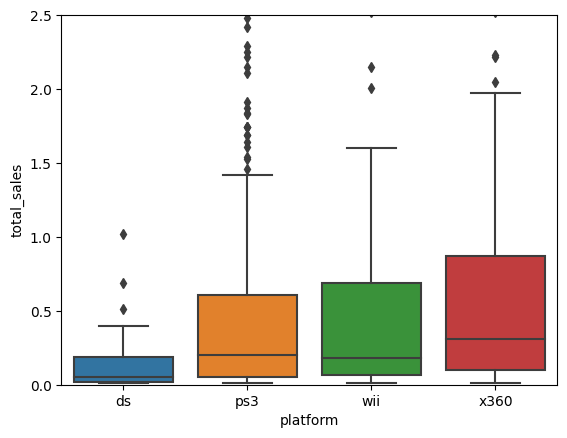

In [20]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las 
# diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos

"""
Tomaré datos del 2012 - 2016 porque son los años en que las consolas más vendidas tuvieron más lanzamientos nuevos de videojuegos
y por ello vendieron más"""

select_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']  

filtered_df = games[games['platform'].isin(selected_platforms)]

new_df = filtered_df[(filtered_df['year_of_release'] >= 2012) & (filtered_df['year_of_release'] <= 2016)]

global_sales = new_df.groupby(['platform','name'])['total_sales'].sum().reset_index()

sns.boxplot(x='platform',y='total_sales',data=global_sales)
plt.ylim(0, 2.5)

La mediana es ligeramente diferente en las plataformas, lo cual refleja que hay casi la misma cantidad de datos en cada plataforma. Pero en todas las plataformas hay muchos datos atipicos lo cual altera el promedio de las ventas y quiere decir que hay mucha dispersión en los datos.

In [21]:
# PLATAFORMAS MAS VENDIDAS DE 2012 - 2016

best_selling_platforms = new_df.groupby(['platform'])['total_sales'].sum().reset_index()

best_selling_platforms = best_selling_platforms.sort_values('total_sales',ascending=False).reset_index(drop=True)

best_selling_platforms

,platform,total_sales
0,ps3,288.79
1,x360,236.54
2,wii,35.37
3,ds,12.55


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Muy buen gráfico y conclusiones. Repítelo en la nueva selección de fechas.

</div>

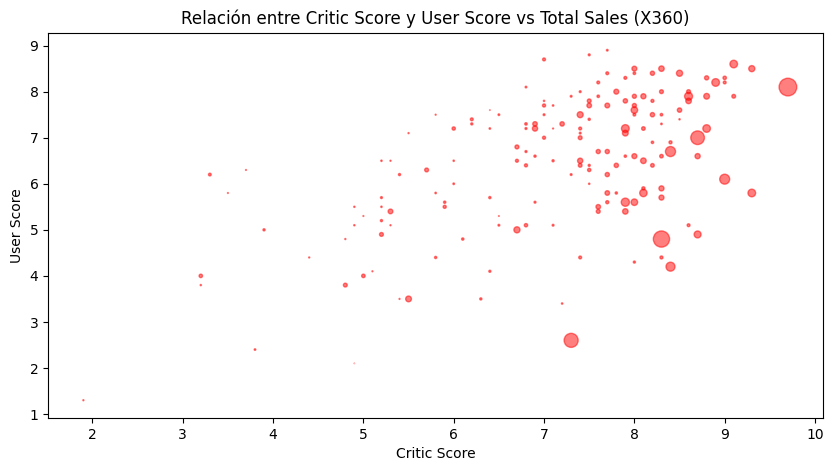

In [22]:
""" Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un 
gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones. """

filtered_new_df = new_df[new_df['platform'] == 'x360']
reviews = filtered_new_df.groupby(['critic_score','user_score'])['total_sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(reviews['critic_score'], reviews['user_score'], s=reviews['total_sales']*10,alpha=0.5,color='red')

plt.title('Relación entre Critic Score y User Score vs Total Sales (X360)')
plt.xlabel('Critic Score')
plt.ylabel('User Score')

plt.show()

In [23]:
# Calcular correlación

reviews['critic_score'].corr(reviews['user_score'])

0.5614856031180144

Existe una correlación entre ambas variables de 0.5614, esto quiere decir que existe una relación media, pero no perfecta entre ambas variables. Probablemente cuando la puntuación de los criticos es una, la de los usuarios suele ser otra, pero no en todos los casos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Excelente hallazgo! La visualización es muy completa, mostrando tres variables haciendo uso del tamaño de los puntos.

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Así como los otros puntos, deberás analizar los nuevos resultados.
    
También puedes analizar la correlación de cada una de las variables de score con las ventas. Que tipo de reseña está más correlacionada con las ventas?
 
</div>

In [24]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

selected_platforms = ['wii', 'x360', 'ps3']

filtere = new_df[new_df['platform'].isin(selected_platforms)]

sales_by_game = filtere.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Hacer tabla dinamica
sales_pivot = sales_by_game.pivot_table(index='name', columns='platform', values='total_sales').reset_index()

# Llenar los NaN con 0, si hay juegos que no se han vendido en alguna plataforma
sales_pivot = sales_pivot.fillna(0)

# Filtrar los juegos que están en las tres plataformas
games_in_all_platforms = sales_pivot[
    (sales_pivot['wii'] > 0) & 
    (sales_pivot['x360'] > 0) & 
    (sales_pivot['ps3'] > 0)
].reset_index(drop=True)

games_in_all_platforms


platform,name,ps3,wii,x360
0,angry birds star wars,0.29,0.26,0.28
1,disney infinity,0.97,1.60,1.44
2,epic mickey 2: the power of two,0.47,0.95,0.51
3,fifa 14,6.46,0.38,4.22
4,fifa 15,4.28,0.56,2.92
5,fifa soccer 13,8.17,0.69,5.16
6,how to train your dragon 2,0.11,0.18,0.16
7,just dance 2014,0.37,3.58,0.99
8,just dance 2015,0.25,2.01,0.61
9,just dance 2016,0.19,0.95,0.31


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Excelente trabajo de transformación! Podrías analizar los juegos con más ventas para mostrar las diferencias más significativas. Cuán correlacionadas estarán estas variables?

</div>

In [25]:
""" Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? 
¿Puedes generalizar acerca de los géneros con ventas altas y bajas? """

games_by_genre = new_df.groupby('genre')['name'].count().reset_index().sort_values(by= 'name',ascending=False)

games_by_genre

,genre,name
0,action,308
10,sports,116
8,shooter,99
7,role-playing,79
1,adventure,63
3,misc,53
2,fighting,49
6,racing,43
9,simulation,22
4,platform,21


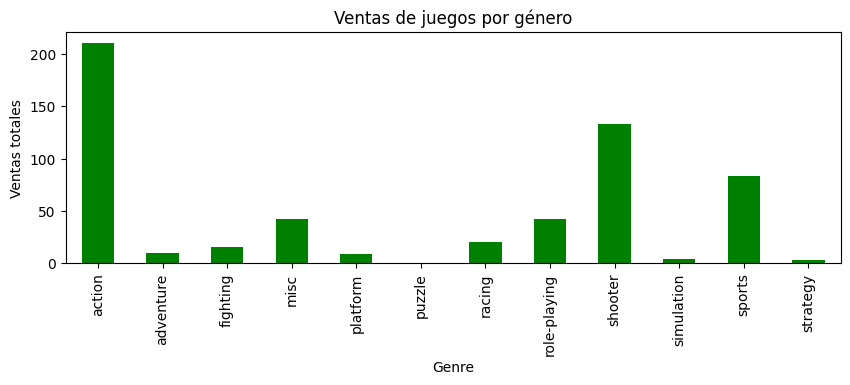

In [26]:
# Gráfica ventas totales por género

sales_by_gender = new_df.groupby('genre')['total_sales'].sum().reset_index()

sales_by_gender.plot(x='genre',kind='bar',title='Ventas de juegos por género',xlabel='Genre',ylabel='Ventas totales', color='green', legend=False, figsize=(10, 3))

plt.show()

Hay más ventas en los géneros action, shooter y sports, esto de debe a que hay más juegos de esos géneros

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Muy buen visualización! Una sugerencia que haría aún más claro el análisis, es ordenar los géneros por ventas totales.

</div>



## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [27]:
# PLATAFORMAS MAS VENDIDAS EN LAS REGIONES

regions=['na_sales', 'eu_sales', 'jp_sales']

sales_by_platform = new_df.pivot_table(index='platform', values=regions, aggfunc ='sum')

sales_by_platform = sales_by_platform.sort_values(regions ,ascending=False).reset_index()

sales_by_platform

,platform,eu_sales,jp_sales,na_sales
0,x360,74.52,1.57,140.05
1,ps3,106.86,35.29,103.38
2,wii,11.92,3.39,17.45
3,ds,3.53,3.72,4.59


La plataforma más vendidas en Norteamérica es el x360 (Xbox360) con ventas de 140.05 millones de dólares, en Europa la platafroma más vendida es el ps3 (Play Station 3) con ventas de 106.86 millones de dólares, mientras que en Japón tambien tiene más ventas el ps3 con 35.29 millones de dólares

Norteamérica lleva la delantera en las ventas de x360,wii y ds, lo cual quiere decir que consumen muchos videojuegos

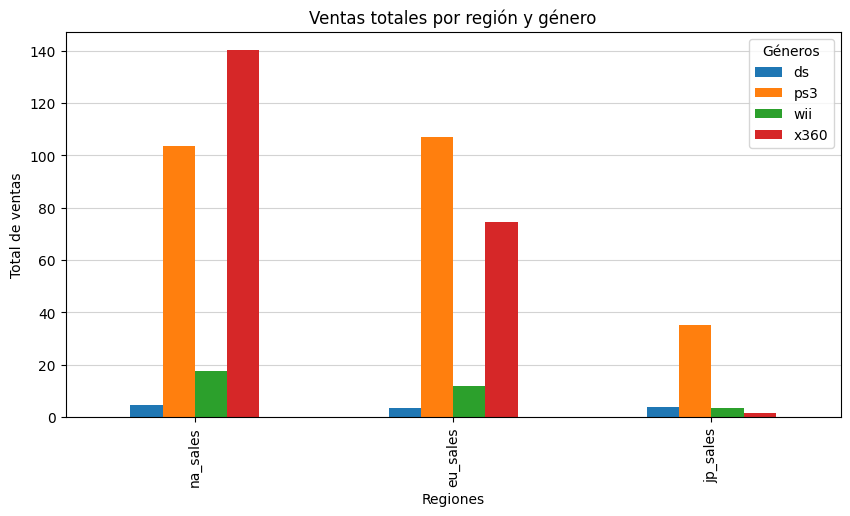

In [28]:
sales_platform = new_df.groupby(['platform'])[regions].sum()
sales_platform_unstacked = sales_platform.T

sales_platform_unstacked.plot(
    title='Ventas totales por región y género',
    xlabel='Regiones',
    ylabel='Total de ventas',
    kind='bar',
    figsize=(10, 5)
)

plt.legend(title='Géneros')
plt.grid(axis ='y',color='lightgray')
plt.gca().set_axisbelow(True)
plt.show()

Cómo se observa en el gráfico, Norteamérica tienen más ventas de plataformas, de ahí le sigue Europa y finalmente Japon,
esto se debe a que probablemente en Japón no consuman mucho plataformas de video, puede que el entretenimiento sea diferente

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Habría que analizar el tamaño de cada mercado para saber si en Japón efectivamente las personas consumen menos plataforma de videos juegos, por ejemplo la población de japón es cerca de un tercio de sólo Estados Unidos. Con estos datos no podemos concluir al respecto, sólo decir que en ventas, Japón es un mercado más chico.
    
</div>

In [29]:
# GENEROS MAS VENDIDAS EN LAS REGIONES

regions=['na_sales', 'eu_sales', 'jp_sales']

sales_gender = new_df.pivot_table(index='genre', values=regions, aggfunc ='sum')

sales_gender = sales_gender.sort_values(regions ,ascending=False).reset_index()

sales_gender

,genre,eu_sales,jp_sales,na_sales
0,action,76.14,15.12,92.39
1,shooter,45.85,4.54,67.01
2,sports,27.77,3.03,42.74
3,misc,13.95,1.92,22.08
4,role-playing,10.05,11.57,17.08
5,fighting,3.79,3.68,6.89
6,racing,10.54,0.79,5.89
7,platform,3.60,0.08,4.56
8,adventure,3.25,1.08,4.19
9,simulation,1.03,0.74,1.63


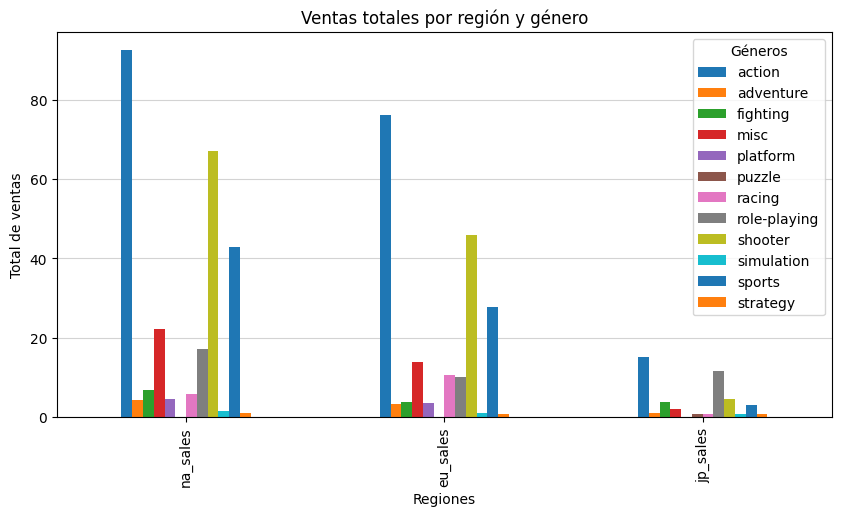

In [30]:
sales_by_genre = new_df.groupby(['genre'])[regions].sum()
sales_by_genre_unstacked = sales_by_genre.T

sales_by_genre_unstacked.plot(
    title='Ventas totales por región y género',
    xlabel='Regiones',
    ylabel='Total de ventas',
    kind='bar',
    figsize=(10, 5)
)

plt.legend(title='Géneros')
plt.grid(axis ='y',color='lightgray')
plt.gca().set_axisbelow(True)
plt.show()

Tanto en Norteamérica cómo en Europa predomina los géneros de acción y shooter, mientras que en Japón lleva la delantes el género acción yrole-playing, esto se debe tambien a las costumbres y culturas que tiene cada país

In [31]:
# CLASIFICACIONES MAS VENDIDAS

regions=['na_sales', 'eu_sales', 'jp_sales']

ratings = new_df.pivot_table(index='rating', values=regions, aggfunc ='sum')

ratings = ratings.sort_values(regions ,ascending=False).reset_index()

ratings

,rating,eu_sales,jp_sales,na_sales
0,m,89.98,12.05,125.04
1,e,42.69,4.00,48.42
2,e10+,24.76,0.56,35.68
3,t,16.61,10.39,26.05


En las 3 regiones se venden más los juegos que son para personas de 17 años de edad en adelante (m)

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Excelente análisis en esta sección! Permiten entender bien el comportamiento de los mercados, aportando conclusiones muy valiosas.
    
Otra alternativa de mostrar los resultados, es pasar a porcentajes a las ventas por cada mercado. De esta forma se pone más foco en las distribuciones y no en el tamaño de los mercados.

</div>


## Prueba las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [32]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

xbox_one = games[games['platform'] == 'xone']['user_score'].dropna().reset_index(drop=True)

pc = games[games['platform'] == 'pc']['user_score'].dropna().reset_index(drop=True)

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(xbox_one, pc) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.3896435533548819e-05
Rechazamos la hipótesis nula


**Hipotesis nula**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    
**Hipótesis anternativa**: Las calificaciones promedio de los usuarios son diferentes entre las plataformas Xbox One y PC

La hipótesis alternativa suele expresar que hay diferencias entre grupos, es por esto que la formule de esta manera

In [33]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

action = new_df[new_df['genre'] == 'action']['user_score'].dropna().reset_index(drop=True)

sports = new_df[new_df['genre'] == 'sports']['user_score'].dropna().reset_index(drop=True)

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(action, sports) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



valor p:  1.996993377463965e-12
Rechazamos la hipótesis nula


**Hipotesis nula**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
    
**Hipótesis anternativa**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

La hipótesis nula la formule de esta manera porque este tipo de hipótesis expresa que no hay diferencias entre los grupos

En las pruebas de hiótesis decidí usar la función de hipótesis sobre la igualdad de la media de 2 poblaciones, porque tanto los generos como las plataformas son diferentes y no a todos los consumidores les debe gustar lo mismo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Muy bien! Los test de hipótesis y su intepretaciones están perfectos!
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1</b> <a class="tocSkip"></a>

Deberías repetir los tests con la nueva selección de años.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a>

Excelente proyecto! Felicitaciones
    
</div>

## Conclusión general

Los juegos que mayor tienen éxito sulen ser los de géneros shooter y action, en las plataformas play station 3, xbox y wii dependiendo la región en la que se consuman.

En la región de Japón no suelen consumir muchas plataformas de videojuegos, esto puede deberse a que juegan más en sus celulares u otros medios.